<a href="https://colab.research.google.com/github/a0958822103/Deeplearn/blob/main/Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://github.com/a0958822103/Deeplearn"><img src="https://1000logos.net/wp-content/uploads/2021/05/GitHub-logo.png" width="115"></a>

In [2]:
!pip install ultralytics

In [3]:
!pip install opencv-python matplotlib numpy
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [4]:
from roboflow import Roboflow
rf = Roboflow(api_key="KRPIyjPxzCtlZzO9WxgH")
project = rf.workspace("neural-ocean").project("neural_ocean")
version = project.version(3)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Neural_Ocean-3 in yolov8:: 100%|██████████| 10266/10266 [00:01<00:00, 7034.66it/s]


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
train: "Neural_Ocean-3/train/images"
val: "Neural_Ocean-3/val/images"

nc: 15
names: ["Mask","can","cellphone","electronics","gbottle","glove",
    "metal","misc","net","pbag","pbottle","plastic","rod","sunglasses","tire"]


In [6]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt')

model.train(data='/content/Neural_Ocean-3/data.yaml', epochs=30, imgsz=640)


100%|██████████| 6.25M/6.25M [00:00<00:00, 242MB/s]


Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/Neural_Ocean-3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 137MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 329MB/s]


AMP: checks passed ✅


train: Scanning /content/Neural_Ocean-3/train/labels... 3626 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3626/3626 [00:02<00:00, 1448.06it/s]


train: New cache created: /content/Neural_Ocean-3/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.24 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
val: Scanning /content/Neural_Ocean-3/valid/labels... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:01<00:00, 709.96it/s]


val: New cache created: /content/Neural_Ocean-3/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.24G      1.458      3.374      1.637         37        640: 100%|██████████| 227/227 [01:23<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.56it/s]


                   all       1000       1891      0.642      0.175      0.168       0.11

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.34G      1.454      2.556       1.61         44        640: 100%|██████████| 227/227 [01:19<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]


                   all       1000       1891      0.677      0.217      0.181      0.103

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.22G      1.469      2.368      1.595         40        640: 100%|██████████| 227/227 [01:18<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       1000       1891      0.778      0.229      0.267      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.42G       1.42      2.185      1.562         30        640: 100%|██████████| 227/227 [01:17<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       1000       1891      0.579      0.269      0.265      0.153

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.23G      1.408      2.025      1.539         30        640: 100%|██████████| 227/227 [01:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       1000       1891      0.602      0.331      0.331      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.35G      1.393      1.928      1.526         40        640: 100%|██████████| 227/227 [01:18<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]


                   all       1000       1891      0.624      0.312      0.341      0.205

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.21G      1.363      1.833      1.507         40        640: 100%|██████████| 227/227 [01:18<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.80it/s]


                   all       1000       1891      0.689      0.347      0.354      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.35G      1.368      1.774      1.499         36        640: 100%|██████████| 227/227 [01:17<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.76it/s]


                   all       1000       1891      0.713      0.326      0.348      0.219

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.34G      1.328      1.698      1.476         35        640: 100%|██████████| 227/227 [01:16<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]


                   all       1000       1891      0.764      0.341      0.376      0.223

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.22G      1.312      1.598      1.454         92        640: 100%|██████████| 227/227 [01:17<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]


                   all       1000       1891       0.72      0.319      0.391      0.245

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.29G      1.302      1.583      1.455         35        640: 100%|██████████| 227/227 [01:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.81it/s]


                   all       1000       1891      0.579      0.359      0.383      0.242

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.32G      1.303      1.564      1.463         49        640: 100%|██████████| 227/227 [01:16<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.79it/s]


                   all       1000       1891      0.686       0.41      0.455      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.28G      1.283      1.493      1.446         51        640: 100%|██████████| 227/227 [01:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]

                   all       1000       1891      0.619      0.379      0.442      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.29G      1.267      1.437      1.428         48        640: 100%|██████████| 227/227 [01:17<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.69it/s]


                   all       1000       1891      0.684      0.452      0.496      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.32G      1.249      1.389      1.419         58        640: 100%|██████████| 227/227 [01:17<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


                   all       1000       1891      0.668      0.391      0.443      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30       2.5G      1.246      1.379      1.407         40        640: 100%|██████████| 227/227 [01:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.66it/s]


                   all       1000       1891      0.741      0.423      0.493      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.43G      1.239      1.334      1.405         31        640: 100%|██████████| 227/227 [01:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.70it/s]


                   all       1000       1891      0.583      0.471      0.517      0.326

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.31G      1.202      1.292      1.379         48        640: 100%|██████████| 227/227 [01:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.64it/s]


                   all       1000       1891      0.622      0.472      0.497      0.323

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.3G      1.203      1.275      1.384         47        640: 100%|██████████| 227/227 [01:17<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.65it/s]


                   all       1000       1891      0.757      0.471       0.53      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.36G      1.195      1.229      1.369         46        640: 100%|██████████| 227/227 [01:17<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.77it/s]


                   all       1000       1891      0.693      0.478      0.515      0.326
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.32G      1.158      1.094      1.392         18        640: 100%|██████████| 227/227 [01:16<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.82it/s]


                   all       1000       1891       0.61      0.501       0.55      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.31G      1.127      1.032      1.372         39        640: 100%|██████████| 227/227 [01:16<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.29it/s]


                   all       1000       1891      0.719      0.472       0.56      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30       2.2G      1.109     0.9811       1.35         14        640: 100%|██████████| 227/227 [01:15<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:08<00:00,  3.80it/s]


                   all       1000       1891      0.728      0.532      0.588      0.385

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.23G      1.086      0.935      1.335         16        640: 100%|██████████| 227/227 [01:15<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:12<00:00,  2.63it/s]

                   all       1000       1891      0.557      0.627      0.598      0.385



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.21G      1.076     0.9311       1.33         15        640: 100%|██████████| 227/227 [01:15<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.67it/s]

                   all       1000       1891      0.652      0.566      0.613      0.392



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.31G      1.068     0.8984      1.317         17        640: 100%|██████████| 227/227 [01:15<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.34it/s]

                   all       1000       1891      0.666      0.583      0.627      0.412



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30       2.3G      1.055      0.878      1.315         16        640: 100%|██████████| 227/227 [01:16<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.20it/s]


                   all       1000       1891      0.628      0.626      0.647      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.34G      1.044     0.8502      1.299         28        640: 100%|██████████| 227/227 [01:15<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:11<00:00,  2.71it/s]

                   all       1000       1891       0.68      0.597      0.632      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.32G      1.026     0.8298      1.292         18        640: 100%|██████████| 227/227 [01:15<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.24it/s]

                   all       1000       1891      0.633      0.631      0.654      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.21G      1.017     0.8222      1.283         19        640: 100%|██████████| 227/227 [01:16<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:09<00:00,  3.42it/s]


                   all       1000       1891      0.641      0.623      0.636       0.42

30 epochs completed in 0.747 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:14<00:00,  2.27it/s]


                   all       1000       1891      0.628      0.625      0.648      0.426
                  Mask         77         90      0.806      0.733       0.82      0.573
                   can         18         20      0.337       0.45       0.39      0.145
             cellphone         61         71      0.947      0.986       0.99      0.854
           electronics         27         40      0.685        0.6      0.641      0.391
               gbottle         36         82      0.489      0.744      0.702       0.48
                 glove         37         55      0.856      0.836      0.866      0.658
                 metal         10         22      0.364      0.182      0.188       0.13
                  misc         48         51       0.53      0.508      0.508      0.301
                   net        146        148        0.7      0.852      0.871      0.564
                  pbag        290        330      0.817      0.964      0.962      0.812
               pbottl

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a34ab376fe0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

In [7]:
import cv2
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')

cap = cv2.VideoCapture(0)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    results = model.predict(source=frame, save=False, imgsz=640)
    annotated_frame = results[0].plot()
    cv2.imshow('YOLOv8 Detection', annotated_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()


In [8]:
# results = model.predict(source='/content/Neural_Ocean-3/test/images/file-20201009-15-1atu53y_jpeg_jpg.rf.c5a9cae14052f4498e053ee74b70b67e.jpg', save=True, conf=0.3)
results = model.predict(source='/content/Neural_Ocean-3/test/images/gloves_in_the_ocean41_jpg.rf.8afd680d678dcdf5ea87c5e25e28873c.jpg', save=True, conf=0.1)


image 1/1 /content/Neural_Ocean-3/test/images/gloves_in_the_ocean41_jpg.rf.8afd680d678dcdf5ea87c5e25e28873c.jpg: 640x640 2 gloves, 21.0ms
Speed: 4.2ms preprocess, 21.0ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


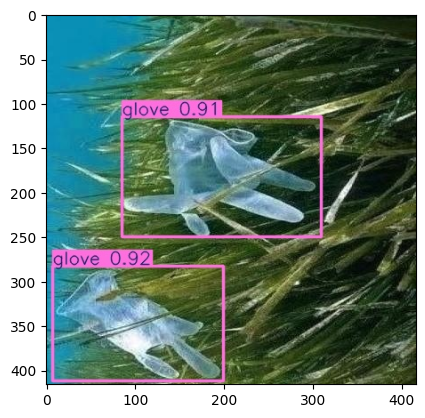

In [10]:
import cv2
import matplotlib.pyplot as plt

img_path = '/content/runs/detect/predict/gloves_in_the_ocean41_jpg.rf.8afd680d678dcdf5ea87c5e25e28873c.jpg'
img = cv2.imread(img_path)

if img is None:
    print(f"Error: Could not load image from {img_path}. Please check the file path and ensure the image exists.")
else:
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()